<a href="https://colab.research.google.com/github/Domver345/UM-Data-Science-Projects/blob/main/Google_Playstore_Apps_rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Import Necessary Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Read the dataset
data = pd.read_csv('/content/googleplaystore.csv')
# Check the first few rows
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Step 2: Data Cleaning and Preprocessing
##1. Handling Missing Values: We will identify and handle missing values in the
dataset.

In [ ]:
# Check for missing values
data.isnull().sum()
# Drop rows with missing values in important columns
data.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'],
inplace=True)
# Check the updated data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
data['Category'].isnull().sum()

np.int64(0)

In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df_category=data['Category'].value_counts()
df_category

,count
Category,
FAMILY,1747
GAME,1097
TOOLS,734
PRODUCTIVITY,351
MEDICAL,350
COMMUNICATION,328
FINANCE,323
SPORTS,319
PHOTOGRAPHY,317


<Axes: ylabel='Category'>

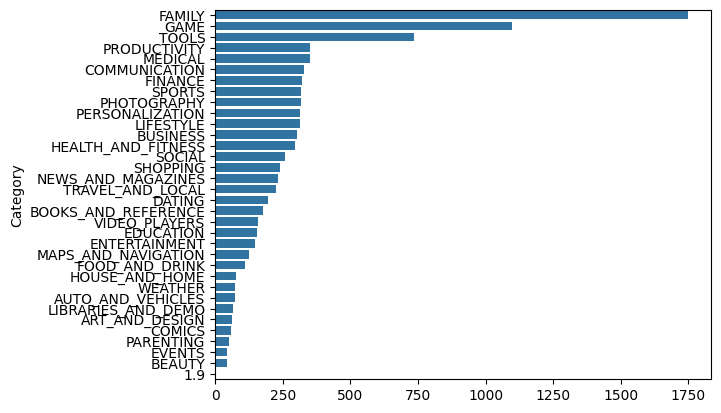

In [ ]:
sns.barplot(x=df_category.values,y=df_category.index,orient='h')

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
data['Installs']=data['Installs'].str.replace(',','')
data['Installs']=data['Installs'].str.replace('+','')
data['Installs']=data['Installs'].replace('Free',np.nan)
data['Installs']=data['Installs'].astype(float)

In [ ]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', 'Everyone', '$1.20'], dtype=object)

In [ ]:
data['Price']=data["Price"].str.replace('$','')
data['Price']=data["Price"].replace('Everyone',np.nan)
data['Price']=data["Price"].astype(float)

In [ ]:
raiting=data['Content Rating'].value_counts()
raiting

,count
Content Rating,
Everyone,7420
Teen,1084
Mature 17+,461
Everyone 10+,397
Adults only 18+,3
Unrated,1


In [ ]:
data.groupby('Category')['Reviews'].sum()

,Reviews
Category,
1.9,3.0M
ART_AND_DESIGN,1599678751021564496716717836815137911211388087...
AUTO_AND_VEHICLES,3671598284170571295421047980512914033971534777...
BEAUTY,1890049790115017393209022254369857296442050104...
BOOKS_AND_REFERENCE,2914724185744785775508140802463154540601554464...
BUSINESS,1612967473012547308518532584217730709911002861...
COMICS,1013635240055710622495168341010238970302438733...
COMMUNICATION,5664284769119316125257964299514290354604324341...
DATING,1545572516801285726766462556777961637126323137...


In [ ]:
data.describe()

,Rating,Installs,Price
count,9367.000000,9.366000e+03,9366.000000
mean,4.193338,1.789744e+07,0.960928
std,0.537431,9.123822e+07,15.816585
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.000000e+04,0.000000
50%,4.300000,5.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,19.000000,1.000000e+09,400.000000


In [ ]:
category_review=data.groupby('Category')['Reviews'].max().head(10)
category_review

,Reviews
Category,
1.9,3.0M
ART_AND_DESIGN,967
AUTO_AND_VEHICLES,994
BEAUTY,964
BOOKS_AND_REFERENCE,98
BUSINESS,984451
COMICS,9952
COMMUNICATION,99559
DATING,97699


In [ ]:
def category_rating(rating):
  try:
    rating = round(rating)
    if int(rating) in range(0,3):
      return 'low'
    elif int(rating) in range(3,5):
      return 'Average'
    elif int(rating) in range(4,6):
      return 'High'
  except ValueError as error:
    return 'none'
data['category_rating']=data['Rating'].apply(category_rating)

In [ ]:
category_r=data['category_rating'].value_counts()
category_r

,count
category_rating,
Average,7299
High,1917
low,150


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,category_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Average
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Average


##2. Converting Columns to Appropriate Data Types:

○ Convert Reviews and Installs to integer types.

○ Convert Price to numeric.

○ Convert Size to a uniform numeric format.

In [ ]:
# Convert 'Reviews' to integer
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce').fillna(0).astype(int)

# Convert 'Installs' by removing '+' and ',' and handling non-numeric values before converting to integer
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',','').replace('+', '') if isinstance(x, str) else x)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0).astype(int)

In [ ]:
# Convert 'Price' by removing '$' and converting to float, handling non-numeric values
data['Price'] = data['Price'].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) and '$' in x else (float(x) if pd.notnull(x) and str(x).replace('.', '', 1).isdigit() else np.nan))

In [ ]:
# Convert 'Size' to numeric (MB) - Convert 'k' to MB
def convert_size(size):
  # Check if the value is a string before applying string methods
  if isinstance(size, str):
    if 'M' in size:
      return float(size.replace('M', ''))
    elif 'k' in size:
      return float(size.replace('k', '')) / 1000
    elif size == 'Varies with device': # Handle 'Varies with device' case
        return np.nan
    else:
      try:
          # Try converting to float directly if no 'M' or 'k' and not 'Varies with device'
          return float(size)
      except ValueError:
          # If conversion to float fails (e.g., 'Everyone'), return NaN
          return np.nan
  else:
      # If not a string (e.g., already a number or NaN), return as is or NaN
      # Returning NaN for non-string types that aren't already numbers is safe
      return np.nan if pd.isna(size) else size

data['Size'] = data['Size'].apply(convert_size)

# Recalculate median size as NaNs may have been introduced during conversion
median_size = data['Size'].median()
data['Size'].fillna(median_size, inplace=True)

<ipython-input-5-76715b78e7c8>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Size'].fillna(median_size, inplace=True)


#3. Handling Duplicate Entries:

In [ ]:
# Check for duplicates
data.duplicated().sum()
# Remove duplicates
data.drop_duplicates(inplace=True)

#Step 3: Exploratory Data Analysis (EDA)
##3.1: Distribution of App Ratings

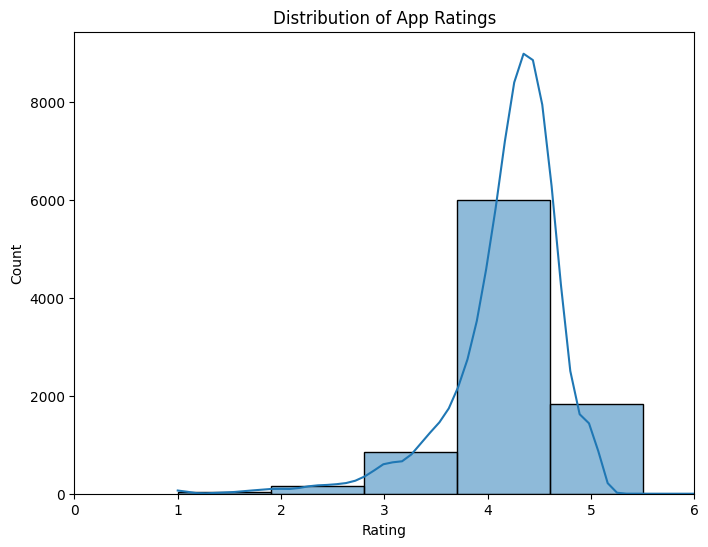

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['Rating'].dropna(), bins=20, kde=True,)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xlim(0, 6)
plt.show()

##3.2: Top 10 Categories by Number of Apps

<ipython-input-8-9444aa83390e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values,


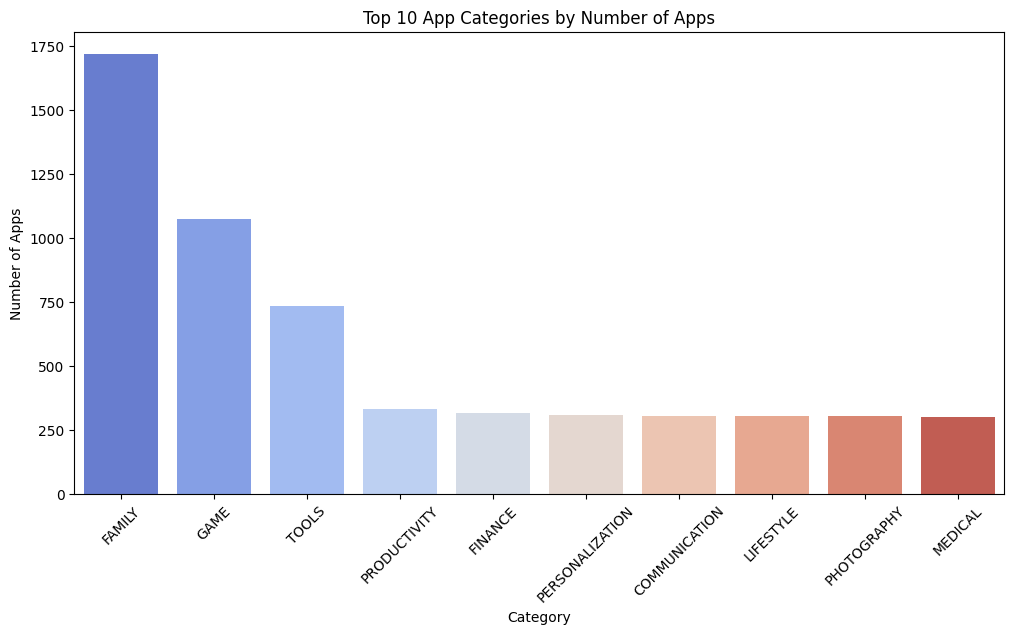

In [ ]:
plt.figure(figsize=(12,6))
top_categories = data['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values,
palette='coolwarm')
plt.title('Top 10 App Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

##3.3: Free vs Paid Apps

<ipython-input-9-b85465b12a3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Type'], palette='Set2')


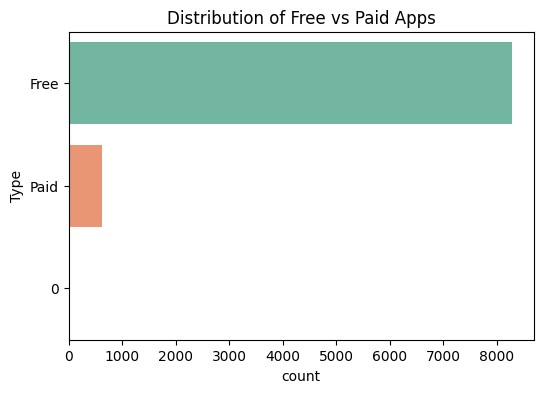

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data['Type'], palette='Set2')
plt.title('Distribution of Free vs Paid Apps')
plt.show()

##3.4: Correlation Between Reviews and Rating

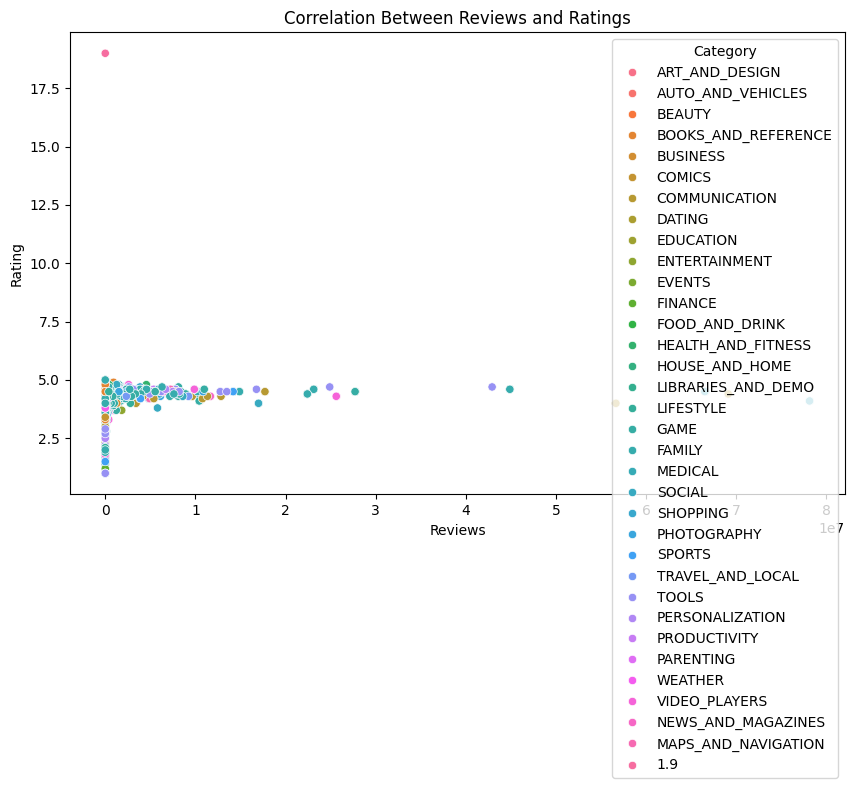

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Reviews', y='Rating', data=data, hue='Category')
plt.title('Correlation Between Reviews and Ratings')
plt.show()

#Step 4: Price Analysis
##4.1: Price Distribution for Paid Apps

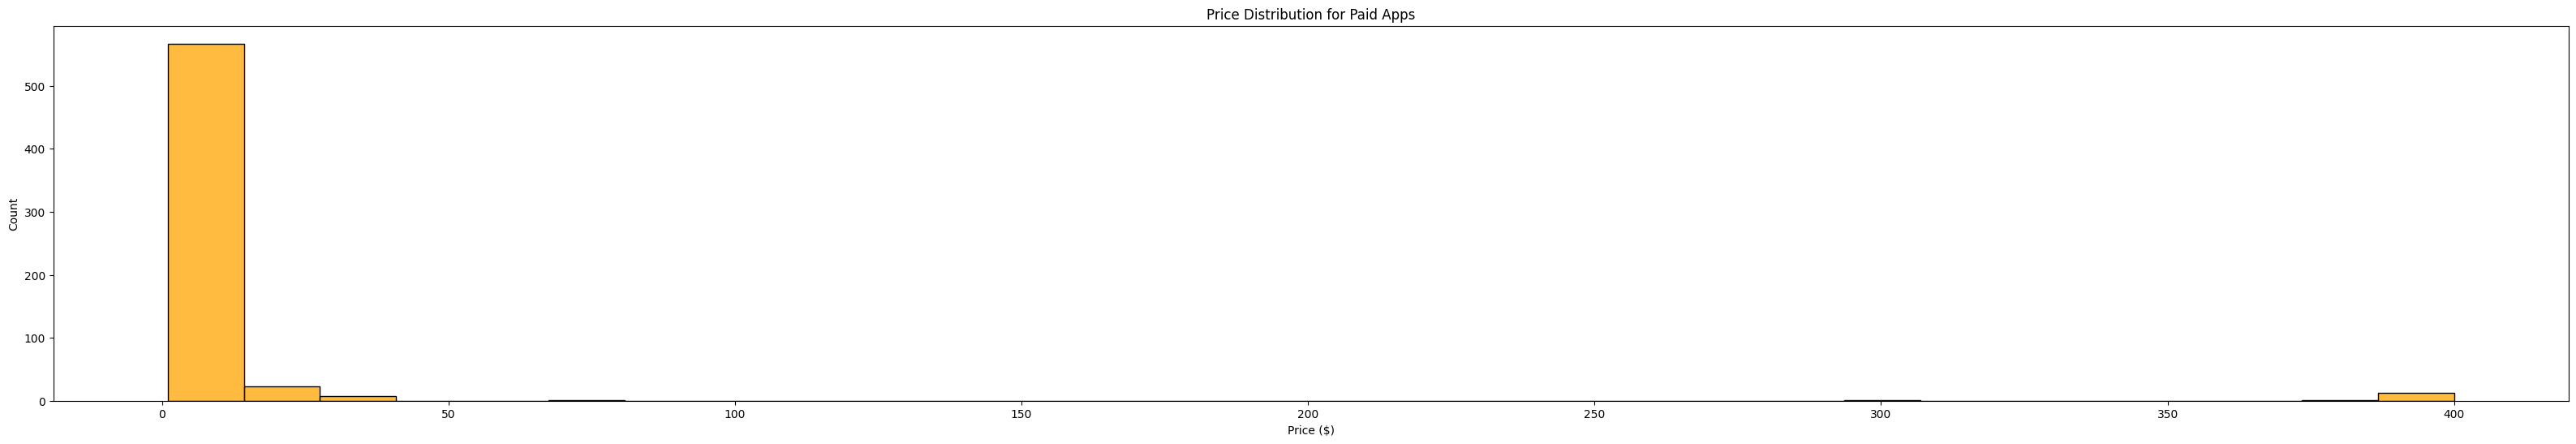

In [ ]:
paid_apps = data[data['Type'] == 'Paid']
plt.figure(figsize=(40,6))
sns.histplot(paid_apps['Price'], bins=30, color='orange')
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

##4.2: Relationship Between Price and Rating

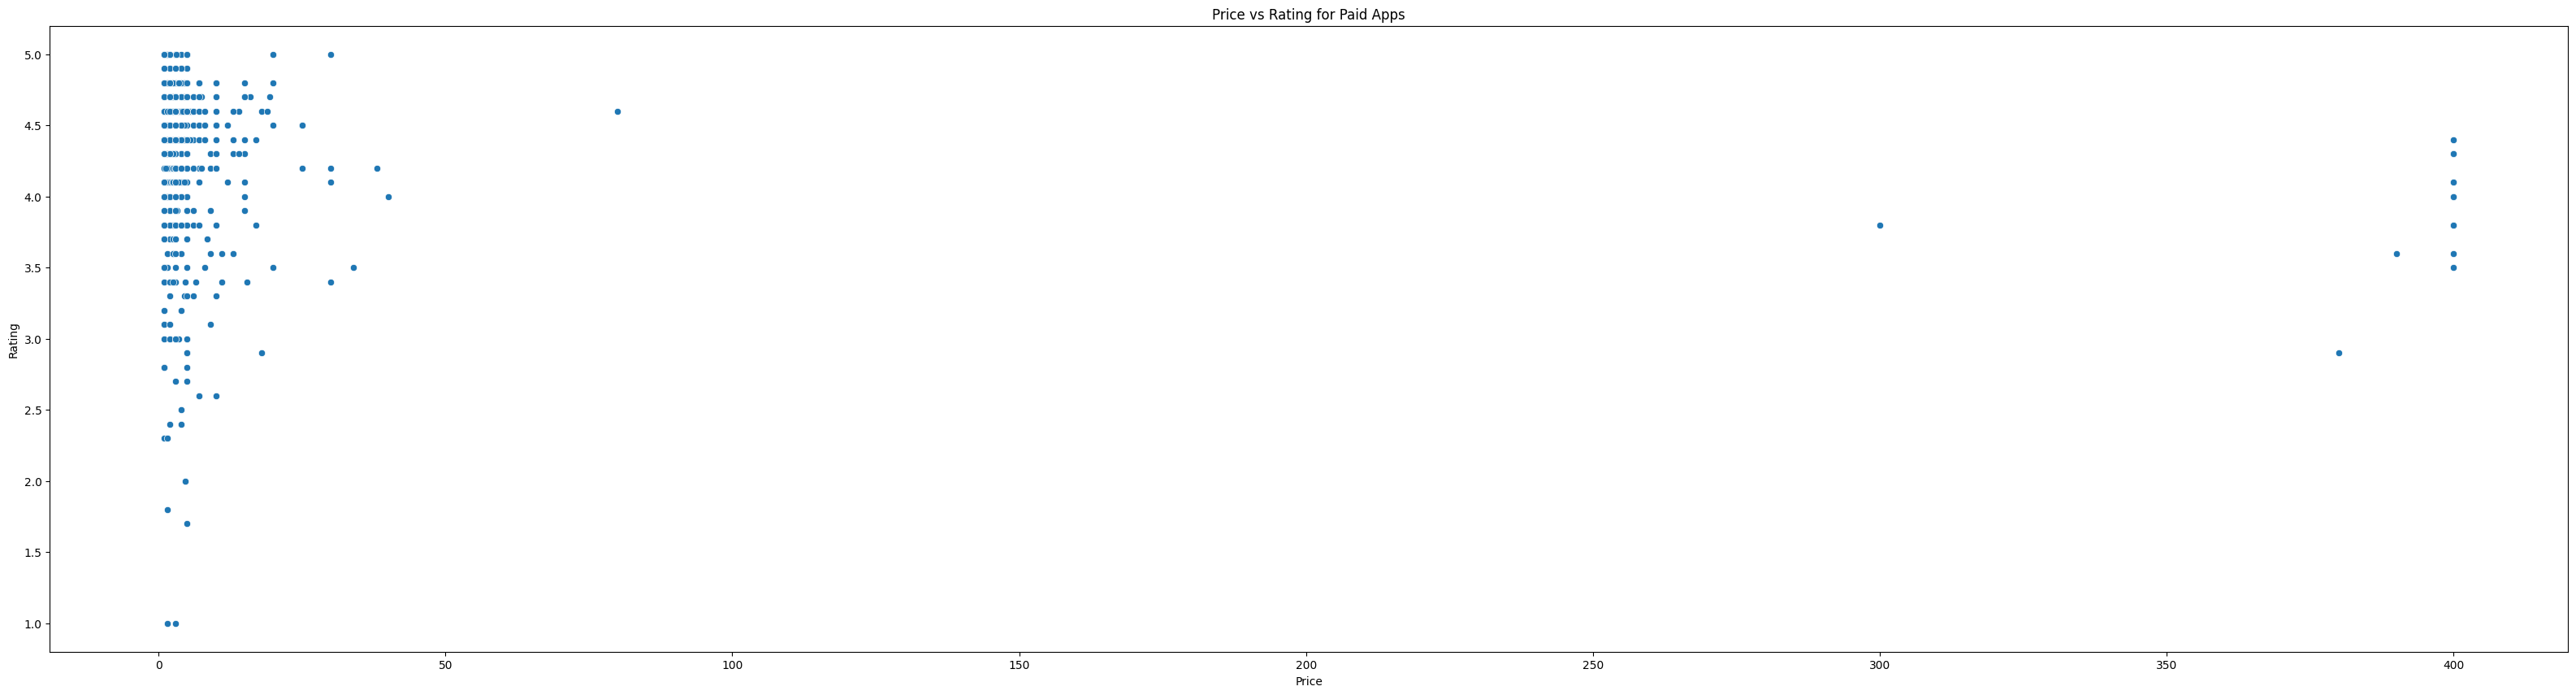

In [ ]:
plt.figure(figsize=(40,10))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title('Price vs Rating for Paid Apps')
plt.show()

#Step 5: Content Rating Analysis
##5.1: Distribution of Content Ratings

<ipython-input-13-dcd74f0df3ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_ratings.index, y=content_ratings.values,


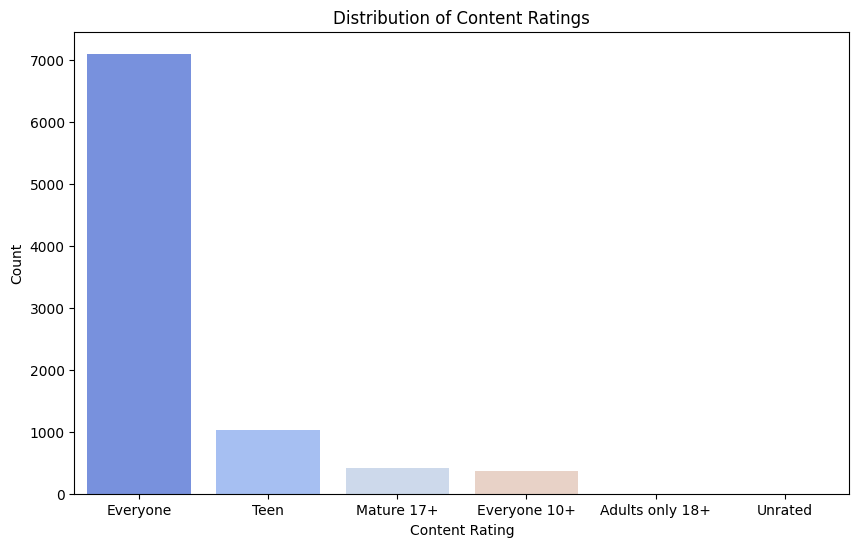

In [ ]:
plt.figure(figsize=(10,6))
content_ratings = data['Content Rating'].value_counts()
sns.barplot(x=content_ratings.index, y=content_ratings.values,
palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

##5.2: Content Rating vs Rating

<ipython-input-14-da3262be33d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content Rating', y='Rating', data=data, palette='Set1')


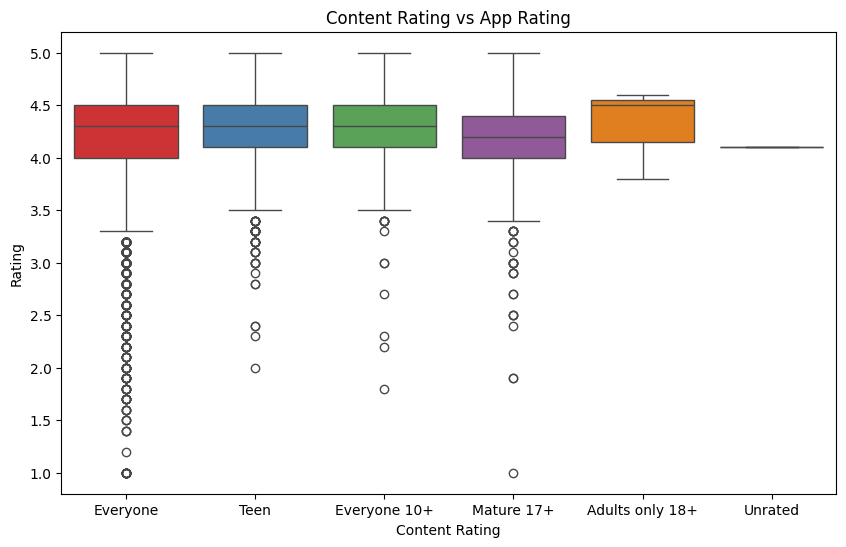

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating', y='Rating', data=data, palette='Set1')
plt.title('Content Rating vs App Rating')
plt.show()

#Step 6: Genre and Installs Analysis
##6.1: Top Genres by Install Count

<ipython-input-15-1127c5d4f32c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_installs.index,


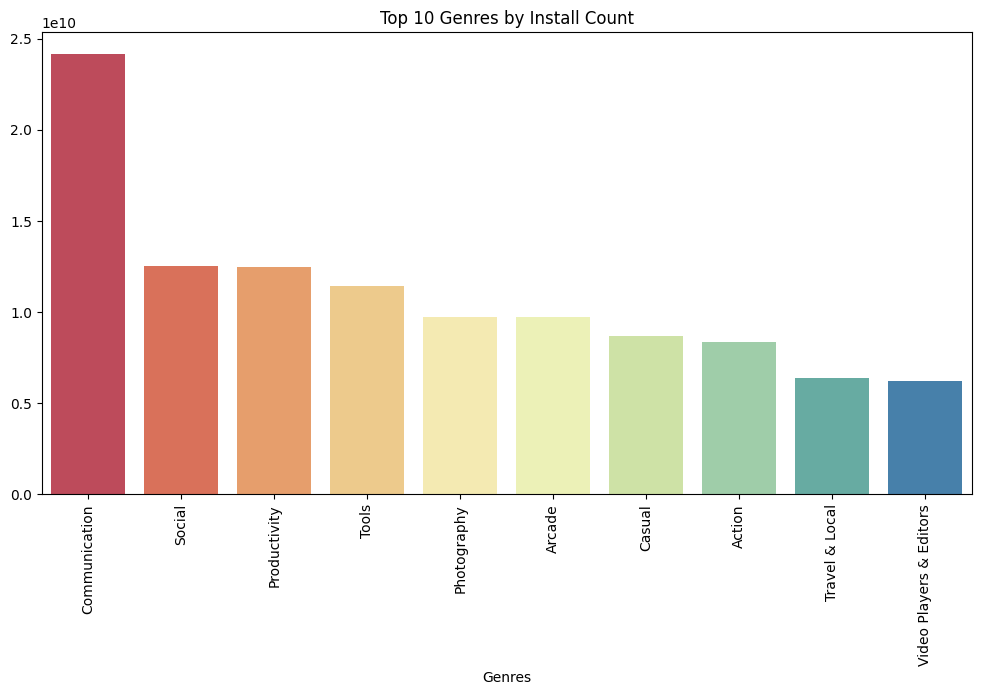

In [ ]:
plt.figure(figsize=(12,6))
top_genres_installs =data.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres_installs.index,
y=top_genres_installs.values, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Top 10 Genres by Install Count')
plt.show()

#Step 7: Machine Learning (Predicting App Rating)
#7.1: Prepare Data for Modeling
We will predict the app rating based on the features in the dataset. First, let's prepare
the data by encoding categorical variables and splitting it into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Content Rating'] = label_encoder.fit_transform(data['Content Rating'])
data['Genres'] = label_encoder.fit_transform(data['Genres'])
# Define features and target variable
X = data[['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Genres', 'Content Rating']]
y = data['Rating']
# Handle missing values in target
y.fillna(y.median(), inplace=True)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##7.2: Train a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.24611288894375727
R-squared: 0.1291898802670035


Conclusion:

● **Data Insights:** We explored the distribution of app ratings, prices, and installs. We identified the top categories and genres in terms of the number of apps and
installs.

● **Machine Learning:** We built a Random Forest model to predict app ratings based
on the dataset, achieving a decent R-squared score.